In [26]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

#Memangil dataset  dalam bentuk xls

data= pd.read_excel('//Users/aningfara/Documents/skizofrenia prediksi/dataset/kurangvarrevisi.xlsx')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   G11_PERASAAN_KHAWATIR                           240 non-null    int64 
 1   G17_MEMBERONTAK                                 240 non-null    int64 
 2   G19_TIDAK_BERAKTIFITAS                          240 non-null    int64 
 3   G20_SEDIH_MENANGIS                              240 non-null    int64 
 4   G21_SEDIKIT_BICARA                              240 non-null    int64 
 5   G23_TERGANGGU                                   240 non-null    int64 
 6   G29 _BICARA                                     240 non-null    int64 
 7   G30_PUTUSASA                                    240 non-null    int64 
 8   G31_CEMAS                                       240 non-null    int64 
 9   G35_MENGURUNG                                   240 no

In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd

#pisahkan fitur dan target
X = data.drop(columns=['Diagnos_encoding_mapping'], axis=1)
y = data['Diagnos_encoding_mapping']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=0)
#inisialisasi SMOTE
smote = SMOTE (random_state=42)

#oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

#cek jumlah sampel setelah oversampling
print("Jumlah sampel sebelum oversampling:", len(X))
print("Jumlah sampel setelah oversampling:",len(X_resampled))

#balikan ke dalam DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Diagnos_encoding_mapping'])], axis=1)
resampled_data.to_excel('skizofrenia.xlsx', index=False)

Jumlah sampel sebelum oversampling: 240
Jumlah sampel setelah oversampling: 280


In [24]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))
y_pred = rfc.predict(X_test)
print ('Skor akurat data testing {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = rfc.predict(X_train)
y_pred_train
print ('Score data training :{:.2f}'.format(rfc.score(X_train, y_train)))
print ('Score data testing :{:.2f}'.format(rfc.score(X_test, y_test)))

0.8611111111111112
Skor akurat data testing 0.86
Score data training :0.96
Score data testing :0.86


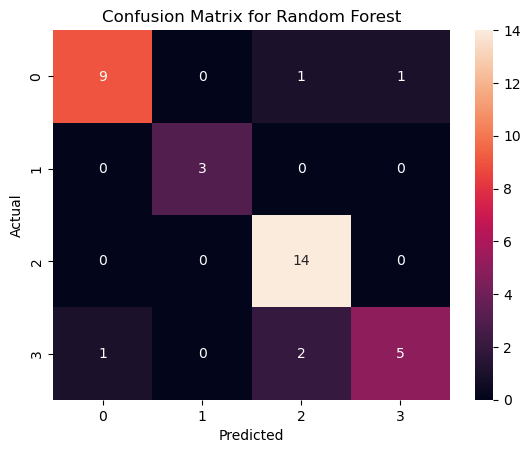

                                                   precision    recall  f1-score   support

                                         Paranoid       0.90      0.82      0.86        11
Severe depressive episode with psychotic symptoms       1.00      1.00      1.00         3
         Shizoaffective disorder, depressive type       0.82      1.00      0.90        14
                                 Undifferentiated       0.83      0.62      0.71         8

                                         accuracy                           0.86        36
                                        macro avg       0.89      0.86      0.87        36
                                     weighted avg       0.86      0.86      0.86        36



In [25]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, pred2)
sns.heatmap (cn, annot=True)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

In [9]:
import joblib
# Misalnya model Random Forest kamu bernama 'rf_model'
joblib.dump(rf_Model, 'model.pkl')

['model.pkl']